## Program Flow

1. モジュールインポート


# 変数定義

In [1]:
pram_traing_rate=0.5       #トレーニングデータとテストデータの比率

# 前処理済みファイルのロード

In [2]:
import numpy as np
import pandas as pd
import sys,os,random
import warnings


# 乱数のシード固定
np.random.seed(0)
random.seed(0)
# データフレームの表示件数の設定
pd.set_option('display.max_columns', 100)

# データロード
df = pd.read_csv('data/fx_preprocessing.csv', index_col=None)
df[df['Date']=='2018-08-31']
df.tail()

,Date,Close,Open,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,std-30,std-60,std-90,label_up,label_none,label_down
4899,2019-05-20,7.645,7.601,0.000000,0.000000,0.000000,0.158124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.757279,-1.002865,-0.899609,0.000000,-1.566952,-0.236251,-0.458355,-0.078875,-0.026305,-0.105139,-0.575540,-0.925443,-2.036345,-2.124646,-1.694258,-1.413748,-1.732385,-2.788080,-3.516121,-4.269521,-4.257463,-4.832853,-4.450031,-4.377909,-4.963741,-4.438019,-4.389937,-3.356643,-3.418043,-3.748259,63.626496,63.626496,63.626496,1.0,0.0,0.0
4900,2019-05-21,7.672,7.623,0.289436,0.000000,0.000000,0.000000,0.448017,0.000000,0.052500,0.000000,0.210333,0.263054,0.183993,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.470035,-0.716332,-0.612777,0.000000,-1.282051,0.000000,-0.170246,0.000000,0.000000,0.000000,-0.287770,-0.638686,-1.752803,-1.841360,-1.409726,-1.128405,-1.447964,-2.506714,-3.236862,-3.992443,-3.980350,-4.557406,-4.173476,-4.101145,-4.688672,-4.161428,-4.113208,-3.076923,-3.138501,63.556604,63.556604,63.556604,1.0,0.0,0.0
4901,2019-05-22,7.670,7.648,0.327955,0.618340,0.000000,0.000000,0.000000,0.777441,0.000000,0.380627,0.157150,0.538977,0.591872,0.512551,0.039241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.143622,-0.390727,-0.286832,0.000000,-0.958301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.312826,-1.430597,-1.519444,-1.086394,-0.804150,-1.124758,-2.186980,-2.919523,-3.677582,-3.665449,-4.244397,-3.859208,-3.786640,-4.376094,-3.847121,-3.798742,-2.759059,63.477776,63.477776,63.477776,0.0,1.0,0.0
4902,2019-05-23,7.561,7.643,0.000000,0.262364,0.552559,0.000000,0.000000,0.000000,0.711556,0.000000,0.315002,0.091671,0.473248,0.526108,0.446839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.065377,0.000000,0.000000,-0.208905,-0.455848,-0.352021,0.000000,-1.023051,0.000000,0.000000,0.000000,0.000000,0.000000,-0.026161,-0.377998,-1.495038,-1.583827,-1.151061,-0.869001,-1.189399,-2.250927,-2.982991,-3.740554,-3.728429,-4.306999,-3.922062,-3.849541,-4.438610,-3.909982,-3.861635,63.488883,63.488883,63.488883,0.0,0.0,1.0
4903,2019-05-24,7.572,7.543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.308387,-1.372908,-1.049456,-0.763057,-1.514558,-1.758270,-1.655802,-0.606140,-2.318052,-0.997506,-1.217915,-0.841330,-0.789162,-0.867394,-1.334205,-1.681439,-2.783864,-2.871491,-2.444387,-2.166018,-2.482224,-3.529863,-4.252348,-5.000000,-4.988034,-5.559033,-5.179133,-5.107561,-5.688922,-5.167211,63.784566,63.784566,63.784566,0.0,1.0,0.0


# トレーニングデータと正解ラベルに分割


In [4]:
#トレーニングデータと正解ラベルに分割

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

# 前後のデータのカット
df3=df.loc[30:(len(df)-30)]
fx_len=len(df3)
df2_num=df3.as_matrix()   #numpyへ変換

# データの分割
train, test = train_test_split(df3, train_size=pram_traing_rate,shuffle=False)


#トレーニングデータと正解ラベルに分割
trainX,testX=train.iloc[:,3:63],test.iloc[:,3:63]
trainY,testY=train.iloc[:,63:66],test.iloc[:,63:66]

#Numpy形式に変換
trainX,testX=trainX.as_matrix(),testX.as_matrix()
trainY,testY=trainY.as_matrix(),testY.as_matrix()

#データサンプル数の確認
print("トレーニングデータ",trainX.shape)
print("トレーニングデータ",trainY.shape)
print("　 　 テストデータ",testX.shape)
print("　 　 テストデータ",testY.shape)

トレーニングデータ (2422, 60)
トレーニングデータ (2422, 3)
　 　 テストデータ (2423, 60)
　 　 テストデータ (2423, 3)


In [22]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping,CSVLogger
from keras import callbacks
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

print("データ数",len(trainY))
model= Sequential()
model.add(Dense(30,activation='relu',input_shape=(trainX.shape[1],)))      
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(trainY.shape[1],activation='softmax'))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

es_cb = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
tb_cb = callbacks.TensorBoard(log_dir='./logs/', histogram_freq=1)  

cbks = [tb_cb,es_cb]
cbks = [tb_cb]

データ数 2372
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 63        
Total params: 2,513
Trainable params: 2,513
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 学習処理
pram_epoch=200
history = model.fit(trainX,trainY,
                   batch_size=100,
                   epochs=pram_epoch,
                   verbose=0,
                   validation_data=(testX,testY),
                   #callbacks=cbks
                   )
        
#学習の評価
score=model.evaluate(testX,testY,verbose=1)

print('Test loass',score[0])
print('Test accuract',score[1]*100,"%")

2373/2373 [==============================] - 0s 24us/step
Test loass 1.1342924635871472
Test accuract 38.938053098601024 %


# モデルの保存

In [24]:
# モデルの保存
open('model/deep.json',"w").write(model.to_json())

# 学習済みの重みを保存
model.save_weights('model/deep_weight.h5')

# グラフによる精度の可視化


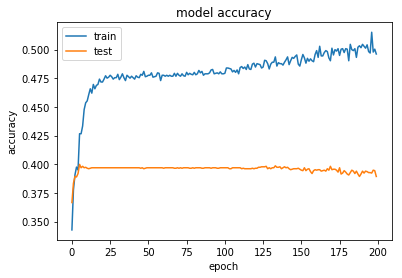

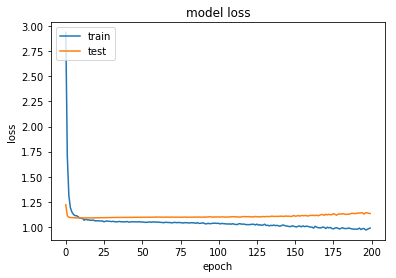

In [25]:
# グラフによる精度の可視化

import matplotlib.pyplot as plt
%matplotlib inline

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# confution matrix

In [26]:
from sklearn import metrics
testYY=np.empty(0)
for i in testY:
    testYY=np.append(testYY,np.argmax(i))
predict_y=model.predict_classes(testX)

print("confusion matrix:")
print(metrics.confusion_matrix( testYY,predict_y))


print()
print("classification report:")
target_names = ['up','none','down']
print(metrics.classification_report(testYY,predict_y))

#metrics.classification_report
print("label_up",test[test['label_up']==1].shape[0])
print("label_none",test[test['label_none']==1].shape[0])
print("label_down",test[test['label_down']==1].shape[0])

confusion matrix:
[[902   5  36]
 [745   3  26]
 [636   1  19]]

classification report:
             precision    recall  f1-score   support

        0.0       0.40      0.96      0.56       943
        1.0       0.33      0.00      0.01       774
        2.0       0.23      0.03      0.05       656

avg / total       0.33      0.39      0.24      2373

label_up 943
label_none 774
label_down 656


In [27]:
close_index=df.columns.get_loc('Close')
open_index=df.columns.get_loc('Open')
date_index=df.columns.get_loc('Date')

MONEY=1000000
#BUY_MONEY=1000000
#BUY=0
resulst_out=""
LEN=len(df2_num)
GRAPH_X=[]
GRAPH_Y=[]

start=len(trainX)
end=len(df2_num)-1
print("start:",df2_num[start,0],"〜end:",df2_num[end,0])

standard=1000000/df2_num[start,1]  
DATE=""
result_out=""

df_sim = pd.DataFrame( columns=['Date', 'Open', 'Close', 'Up', 'money','result','predict','正誤','利益率'] )

start: 2009-11-16 〜end: 2018-11-23


In [28]:
for i in range(start,end): 
        PRE=df2_num[i,np.array([
                               3,4,5,
                               6,7,8,
                               9,10,11,
                               12,13,14,
                               15,16,17,
                               18,19,20,
                               21,22,23,
                               24,25,26,
                               27,28,29,
                               30,31,32,

                               33,34,35,
                               36,37,38,
                               39,40,41,
                               42,43,44,
                               45,46,47,
                               48,49,50,
                               51,52,53,
                               54,55,56,
                               57,58,59,
                               60,61,62,
                               ])]
        
        #予測のコマンド
        PRE2 = model.predict_proba(np.resize(PRE,(1,trainX.shape[1])),verbose=0)
        PRE2=PRE2[0]
        
        profit_rate=0
        DATE2=df2_num[i,date_index]
        if DATE != DATE2[:7]:       #月初の定点観測
            DATE=DATE2[:7]
            print()
            resulst_out=resulst_out+"\n"
            if DATE2[5:7]=="01":
                print("--------------------------------------------------------------------")
                resulst_out=resulst_out+"--------------------------------------------------------------------"+"\n"
            STRING=df2_num[i,0]+":資金"+"{:,}".format(int(MONEY))+"(基準"+"{:,}".format(int(standard*df2_num[i,1])).strip()+")"
            print(STRING.strip(),end="")
            result_out=result_out+STRING.strip()+"\n"



        PREDICT    ="None"
        #  売り予測の場合
        if PRE2[2]>0.4:
            PREDICT="sell"
            #print("売:",end=" ")
            profit_rate=df2_num[i,open_index]/df2_num[i, close_index]
            MONEY=(profit_rate)*MONEY

        #  買い予測の場合
        if PRE2[0]>0.4:
            PREDICT="buy"
            #print("買",end=" ")
            profit_rate=df2_num[i,close_index]/df2_num[i,open_index]
            MONEY=(profit_rate)*MONEY

        if df2_num[i,63]==1:
            Y_result="buy"
        elif df2_num[i,65]==1:
            Y_result="sell"
        else:
            Y_result="None"
            
        seigo="×"    
        if Y_result==PREDICT:
            seigo="●"
        
        if profit_rate!=0:
            profit_rate=100*(profit_rate-1)
        
        s1 = pd.Series([df2_num[i,0],                 #日付
                        round(df2_num[i,open_index], 2),        #OPEN
                        round(df2_num[i,close_index],2),        #Close
                        round((df2_num[i,close_index]/df2_num[i,open_index]-1)*100,2),  #アップ率
                        round(MONEY),
                        Y_result,PREDICT,seigo,
                        round(profit_rate,2)],                     #予測
               index=df_sim.columns)
        df_sim=df_sim.append(s1,ignore_index=True)


2009-11-16:資金1,000,000(基準999,999)
2009-12-01:資金1,038,610(基準979,460)
--------------------------------------------------------------------
2010-01-01:資金1,183,290(基準1,039,354)
2010-02-01:資金1,138,038(基準1,000,536)
2010-03-01:資金1,148,323(基準963,816)
2010-04-01:資金1,323,882(基準1,071,732)
2010-05-03:資金1,394,112(基準1,052,075)
2010-06-01:資金1,355,428(基準972,509)
2010-07-01:資金1,455,030(基準934,682)
2010-08-02:資金1,621,361(基準978,015)
2010-09-01:資金1,651,210(基準956,097)
2010-10-01:資金1,804,452(基準991,183)
2010-11-01:資金1,852,200(基準952,027)
2010-12-01:資金2,050,886(基準990,142)
--------------------------------------------------------------------
2011-01-03:資金2,325,700(基準1,018,087)
2011-02-01:資金2,356,013(基準943,416)
2011-03-01:資金2,490,758(基準965,780)
2011-04-01:資金2,657,836(基準1,036,109)
2011-05-02:資金2,719,556(基準1,016,007)
2011-06-01:資金2,747,609(基準977,140)
2011-07-01:資金2,799,676(基準991,595)
2011-08-01:資金2,860,067(基準947,395)
2011-09-01:資金2,832,241(基準907,026)
2011-10-03:資金2,604,984(基準762,835)
2011-11-01:資金2,685,236(基準798,73

In [29]:
# ファイルの保存
df_sim.to_csv('data/simulation.csv',index=False)

# 年毎の利益率の計算


In [30]:
print("●",df_sim[df_sim['正誤']=="●"].shape)
print("X",df_sim[df_sim['正誤']=="×"].shape)

for i in range(7,19):
    YEAR=str(i+2000)
    start=YEAR+"-01-01"
    end=YEAR+"-12-31"

    tmp=df_sim.query("Date >= @start and Date <= @end ")
    
    print("{:}年の利益率{:.2f}%".format(YEAR,tmp[['利益率']].sum()[0]))
df_sim[(
    df_sim['Date'].str.contains('01-01') |
    df_sim['Date'].str.contains('04-01') |
    df_sim['Date'].str.contains('07-01') |
    df_sim['Date'].str.contains('10-01') 
)]

● (920, 9)
X (1452, 9)
2007年の利益率0.00%
2008年の利益率0.00%
2009年の利益率18.79%
2010年の利益率67.24%
2011年の利益率26.32%
2012年の利益率54.25%
2013年の利益率77.77%
2014年の利益率43.69%
2015年の利益率-7.01%
2016年の利益率3.50%
2017年の利益率12.12%
2018年の利益率3.89%


,Date,Open,Close,Up,money,result,predict,正誤,利益率
34,2010-01-01,12.55,12.59,0.33,1187204,None,buy,×,0.33
35,2010-01-04,12.56,12.70,1.15,1200845,buy,buy,●,1.15
36,2010-01-05,12.68,12.53,-1.18,1186653,sell,buy,×,-1.18
37,2010-01-06,12.51,12.63,0.98,1198253,buy,buy,●,0.98
38,2010-01-07,12.59,12.56,-0.23,1195522,None,buy,×,-0.23
39,2010-01-08,12.56,12.59,0.23,1198311,None,buy,×,0.23
40,2010-01-11,12.59,12.48,-0.87,1187916,sell,buy,×,-0.87
41,2010-01-12,12.48,12.24,-1.96,1164638,sell,buy,×,-1.96
42,2010-01-13,12.24,12.35,0.87,1174724,buy,buy,●,0.87
43,2010-01-14,12.35,12.33,-0.16,1172831,None,buy,×,-0.16


In [31]:
# 予測の数
print("予測buy: ",df_sim[df_sim['predict']=='buy'].shape[0])
print("予測None:",df_sim[df_sim['predict']=='None'].shape[0])
print("予測sell:",df_sim[df_sim['predict']=='sell'].shape[0])

# 購入予測した場合の勝率
df_buy=df_sim[df_sim['predict']=='buy']
print("購入予測数",df_buy.shape[0])

# 予測の内、実際の正解
print("予測の内,実際のbuy   :{:}({:.1f}%)".format(
    df_sim[df_sim['result']=='buy'].shape[0],
    df_buy[df_buy['result']=='buy'].shape[0]/df_buy.shape[0]*100))
print("予測の内,実際のNone  :{:}({:.1f}%)".format(
    df_sim[df_sim['result']=='None'].shape[0],
    df_buy[df_buy['result']=='None'].shape[0]/df_buy.shape[0]*100))
print("予測の内,実際のsell  :{:}({:.1f}%)".format(
    df_sim[df_sim['result']=='sell'].shape[0],
    df_buy[df_buy['result']=='sell'].shape[0]/df_buy.shape[0]*100))

予測buy:  2234
予測None: 85
予測sell: 53
購入予測数 2234
予測の内,実際のbuy   :943(39.4%)
予測の内,実際のNone  :774(32.7%)
予測の内,実際のsell  :655(27.9%)


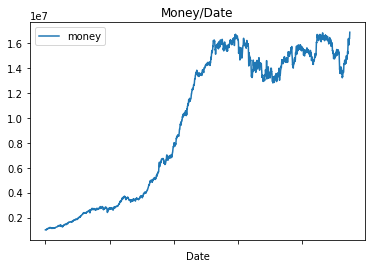

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

df_sim.plot(x='Date',y='money',title='Money/Date')